In [1]:
# This model is essentially a "hello world" type thing. I am using the Book in TinyML (by Warden et al)
# To explore how to deploy Machine Learning models to tiny machines (Arduino Nano Sense in my case).
# I think this is gonna be pretty sweet!
# Using google collab, as this needs to be updated and some models may be complex!

# -Kieran

In [2]:
#! pip install tensorflow==2.4.0rc0

In [3]:
# Imports

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
print(tf.__version__)

2.3.0


In [4]:
samples = 10000

# Generate a uniformly distributed set of random numbers in the range from # 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=samples)

In [5]:
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

In [6]:
# Calculate the corresponding  values
y_values = np.sin(x_values)*np.cos(x_values)

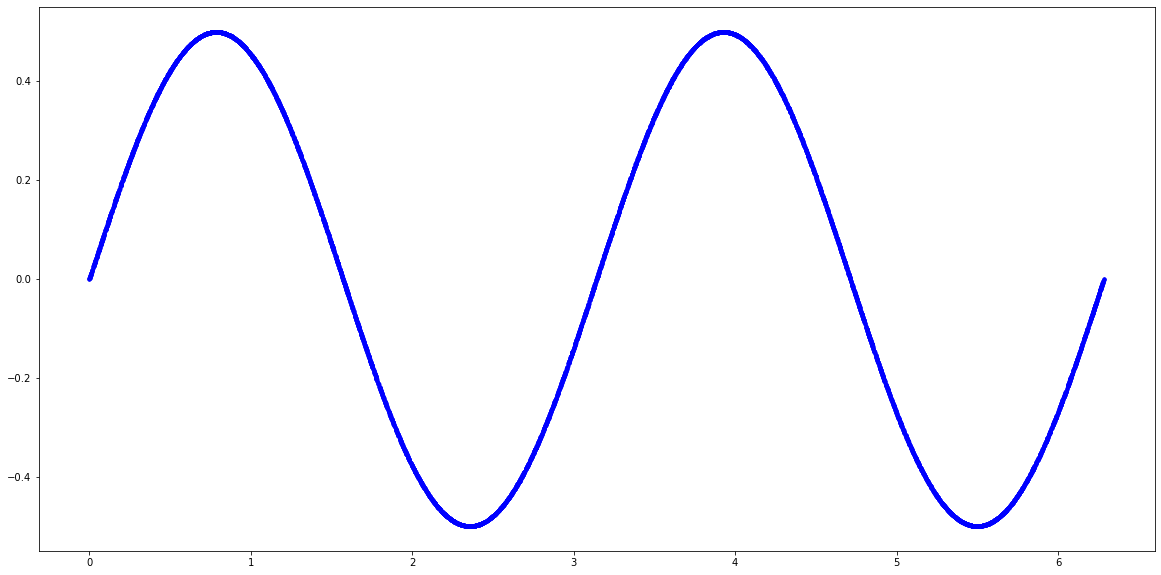

In [7]:
# Plot 
plt.figure(figsize=(20,10))
plt.plot(x_values, y_values, 'b.') 
plt.show()

In [8]:
 # Add some noise
y_values += 0.2 * np.random.randn(*y_values.shape)

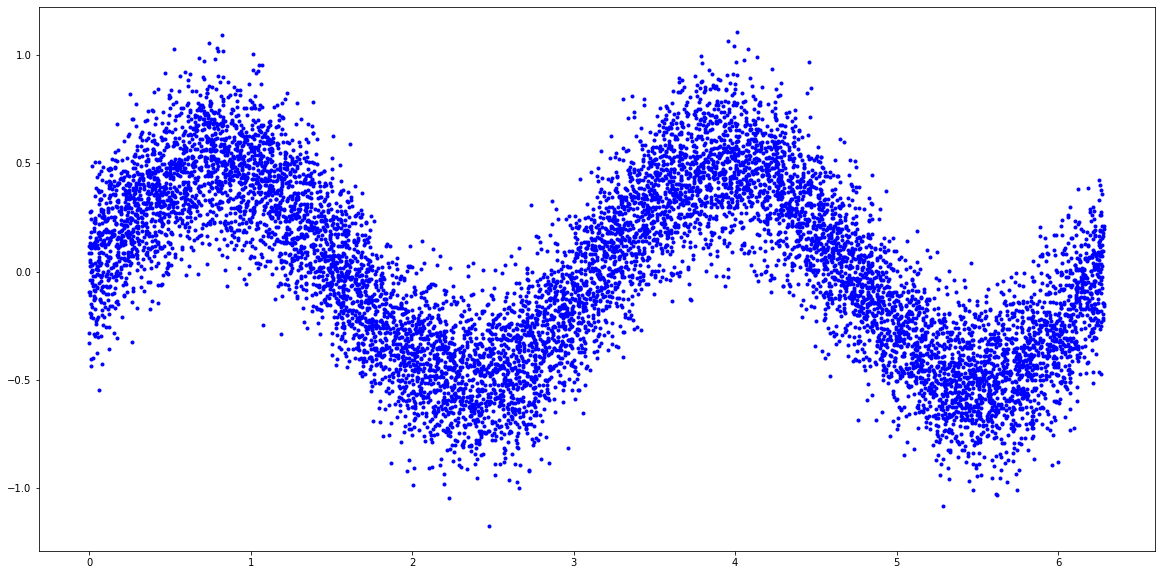

In [9]:
# Plot 
plt.figure(figsize=(20,10))
plt.plot(x_values, y_values, 'b.') 
plt.show()

In [10]:

# 60% of our data for training and 20% for testing. 20% # will be used for validation.
train_split = int(0.6 * samples)
test_split = int(0.2 * samples + train_split)
 
x_train, x_validate, x_test = np.split(x_values, [train_split, test_split]) 
y_train, y_validate, y_test = np.split(y_values, [train_split, test_split])

In [11]:
x_train.shape

(6000,)

In [12]:
x_validate.shape

(2000,)

In [13]:
x_test.shape

(2000,)

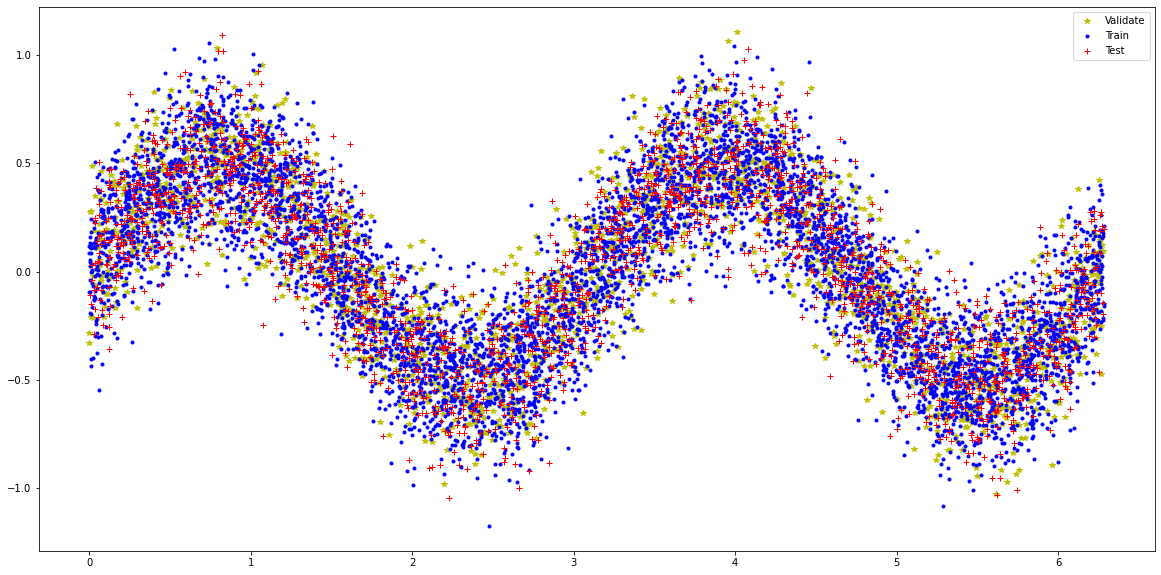

In [14]:
plt.figure(figsize=(20,10))
plt.plot(x_validate, y_validate, 'y*', label="Validate")
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r+', label="Test") 
plt.legend()
plt.show()


In [15]:
# Making model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(8, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='adam', loss='mse', metrics=['mae']) 
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fitting model

history_1 = model_1.fit(x_train, y_train, epochs=100, batch_size = 8, validation_data=(x_validate, y_validate))

Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.1599 - mae: 0.3355 - val_loss: 0.1487 - val_mae: 0.3163
Epoch 2/100
750/750 [==============================] - 1s 868us/step - loss: 0.1482 - mae: 0.3196 - val_loss: 0.1453 - val_mae: 0.3129
Epoch 3/100
750/750 [==============================] - 1s 859us/step - loss: 0.1478 - mae: 0.3188 - val_loss: 0.1447 - val_mae: 0.3123
Epoch 4/100
750/750 [==============================] - 1s 856us/step - loss: 0.1478 - mae: 0.3182 - val_loss: 0.1452 - val_mae: 0.3142
Epoch 5/100
750/750 [==============================] - 1s 853us/step - loss: 0.1476 - mae: 0.3181 - val_loss: 0.1472 - val_mae: 0.3139
Epoch 6/100
750/750 [==============================] - 1s 855us/step - loss: 0.1477 - mae: 0.3181 - val_loss: 0.1445 - val_mae: 0.3130
Epoch 7/100
750/750 [==============================] - 1s 881us/step - loss: 0.1475 - mae: 0.3183 - val_loss: 0.1456 - val_mae: 0.3126
Epoch 8/100
750/750 [==============================] - 1s

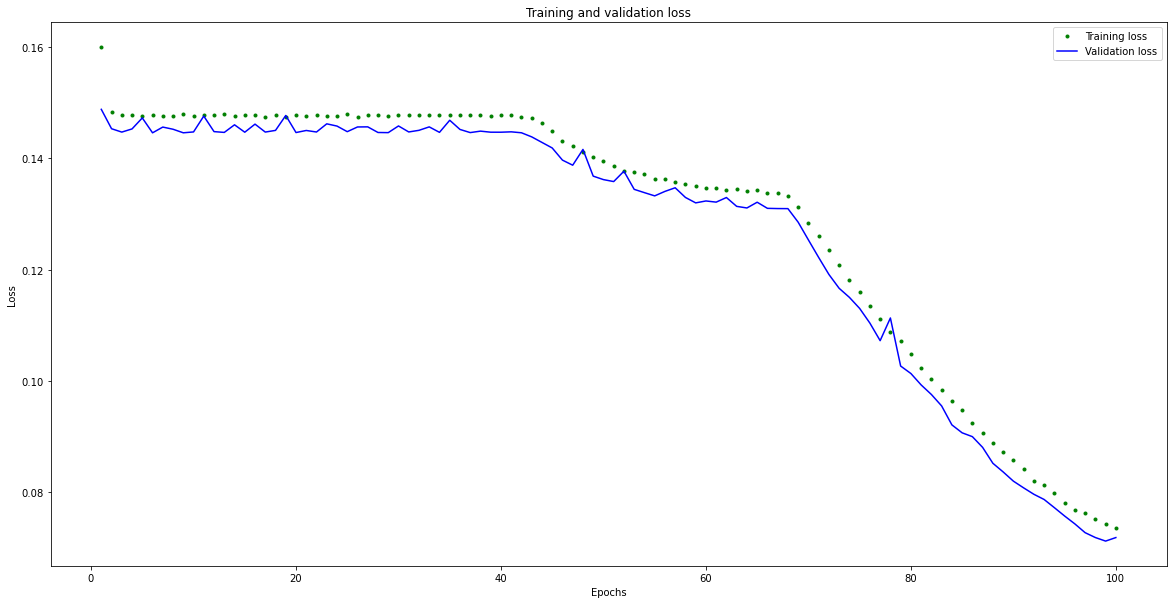

In [17]:
# Observing losses - model 1

loss = history_1.history['loss'] 
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

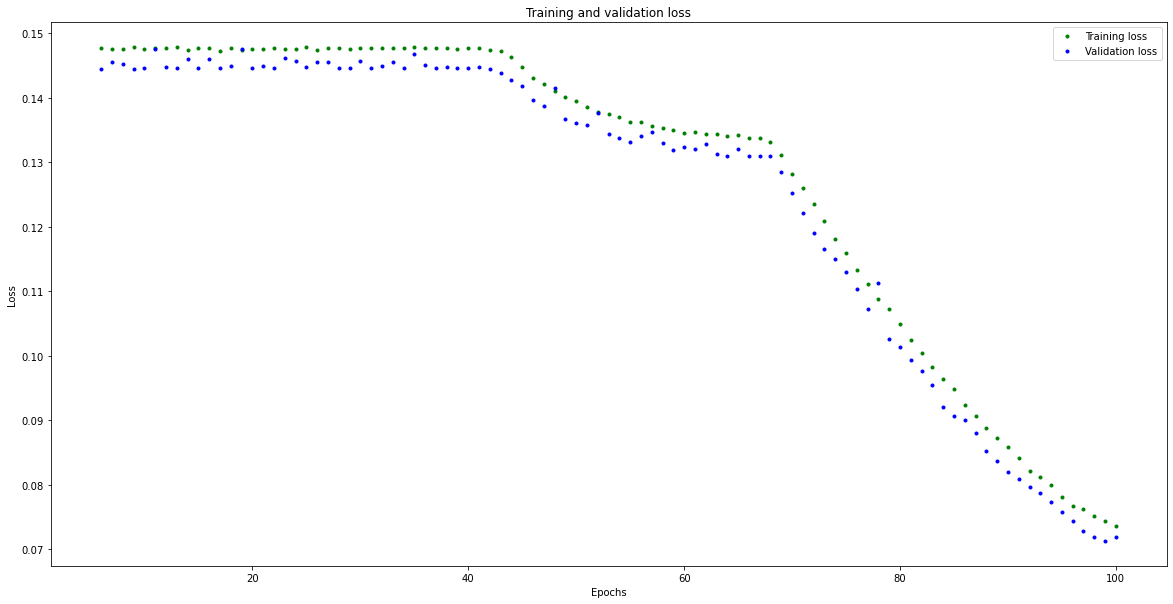

In [18]:
 # Excluding the first few epochs 
SKIP = 5
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

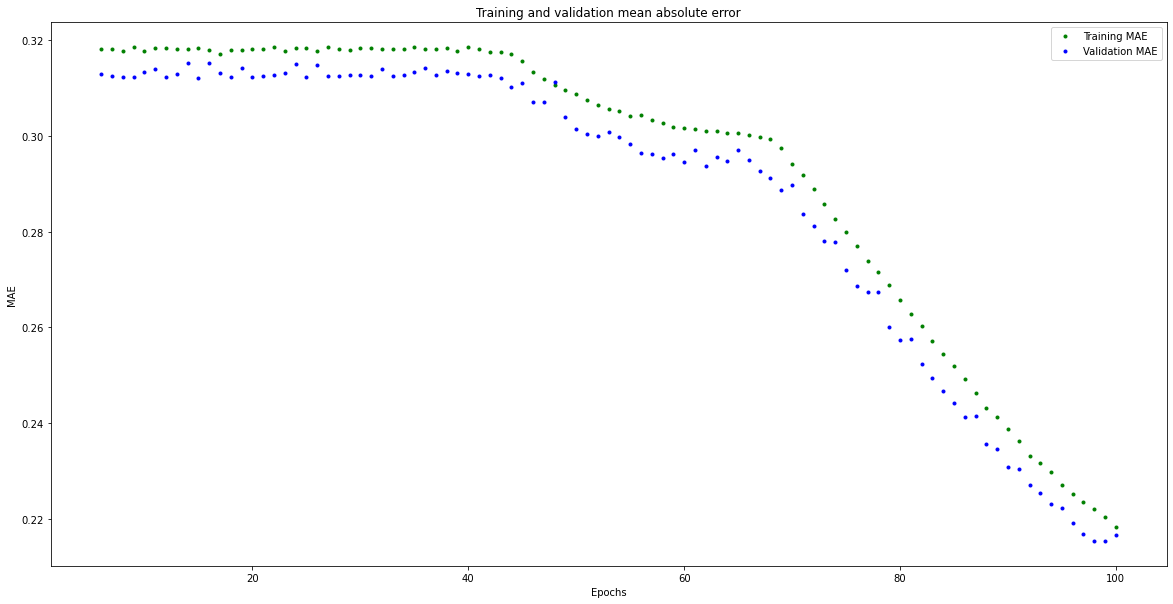

In [19]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE') 
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error') 
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

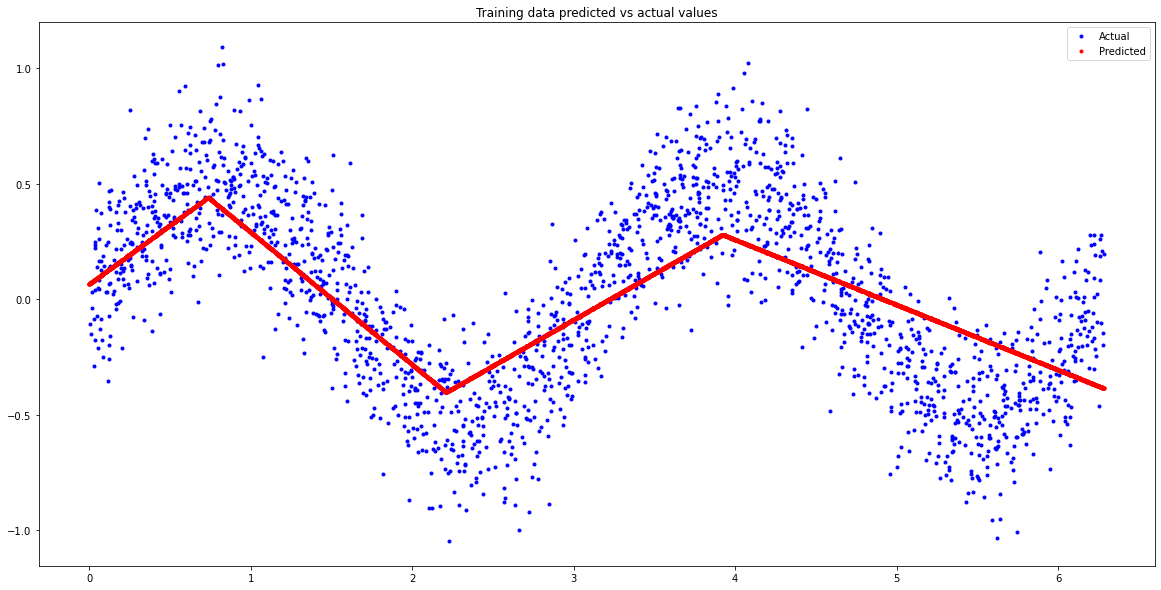

In [20]:
# Making and plotting predicitions

predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual') 
plt.plot(x_train, predictions, 'r.', label='Predicted') 
plt.legend()
plt.show()

In [21]:
# Imporving model -> model 2

model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(32, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(32, activation='relu'))
model_2.add(layers.Dense(1))

earlystop_callback = EarlyStopping(monitor='val_mae', patience=20, mode = 'min') # Adding early stopping
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Show a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_2 = model_2.fit(x_train, y_train, 
                        epochs=500, batch_size=16, 
                        validation_data=(x_validate, y_validate),
                        callbacks=[earlystop_callback])

Epoch 1/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1500 - mae: 0.3224 - val_loss: 0.1372 - val_mae: 0.3031
Epoch 2/500
375/375 [==============================] - 0s 984us/step - loss: 0.1375 - mae: 0.3038 - val_loss: 0.1296 - val_mae: 0.2898
Epoch 3/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1283 - mae: 0.2915 - val_loss: 0.1220 - val_mae: 0.2779
Epoch 4/500
375/375 [==============================] - 0s 979us/step - loss: 0.1200 - mae: 0.2798 - val_loss: 0.1169 - val_mae: 0.2757
Epoch 5/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1120 - mae: 0.2695 - val_loss: 0.1053 - val_mae: 0.2549
Epoch 6/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1020 - mae: 0.2560 - val_loss: 0.0944 - val_mae: 0.2421
Epoch 7/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0906 - mae: 0.2413 - val_loss: 0.0810 - val_mae: 0.2265
Epoch 8/500
375/375 [==============================] - 0s 1ms/ste

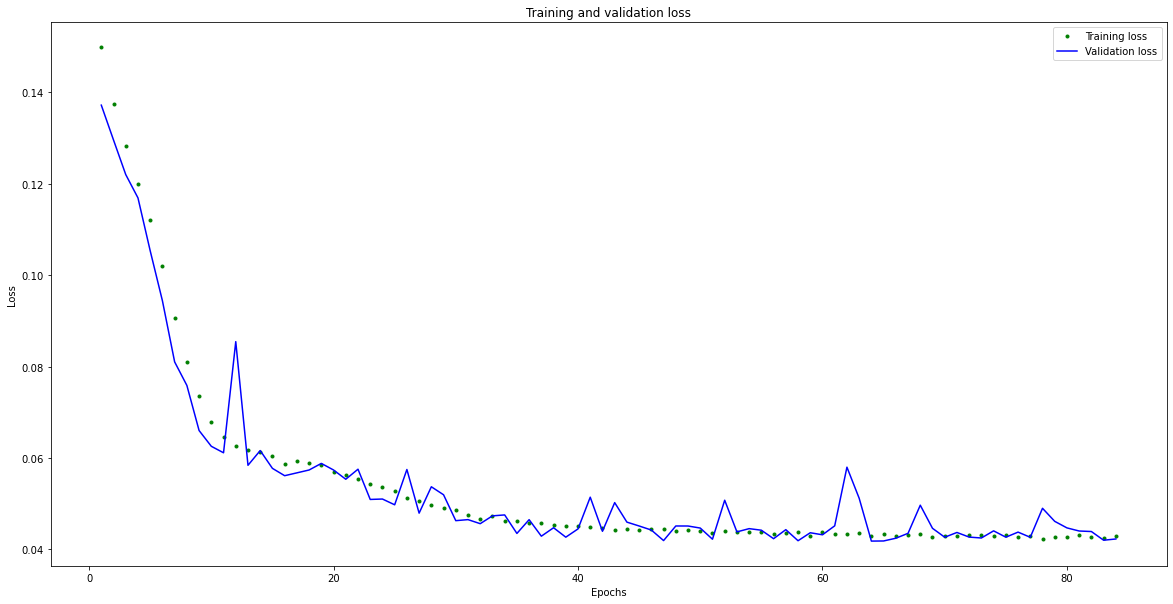

In [23]:
# Observing losses - model 2

loss = history_2.history['loss'] 
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

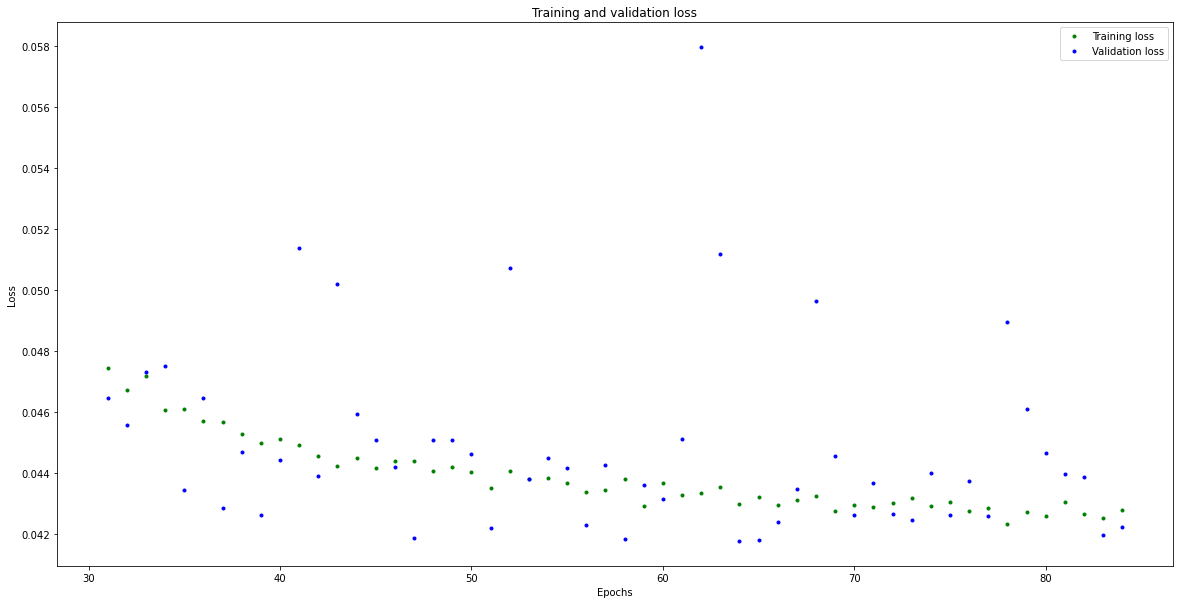

In [24]:
 # Excluding the first few epochs 
SKIP = 30
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

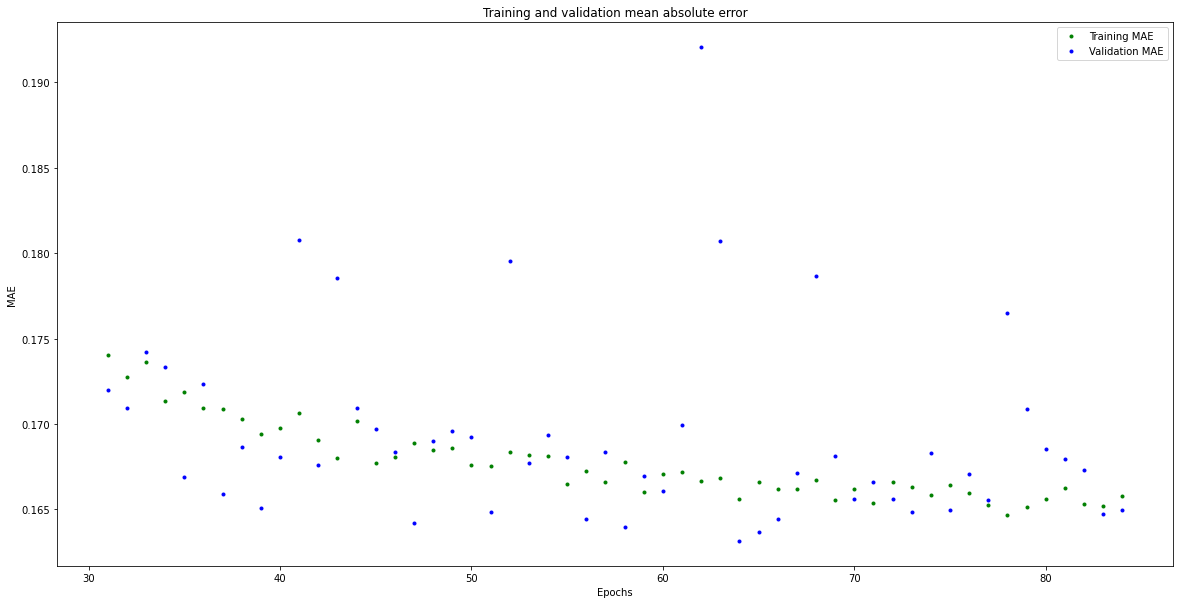

In [25]:
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE') 
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error') 
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

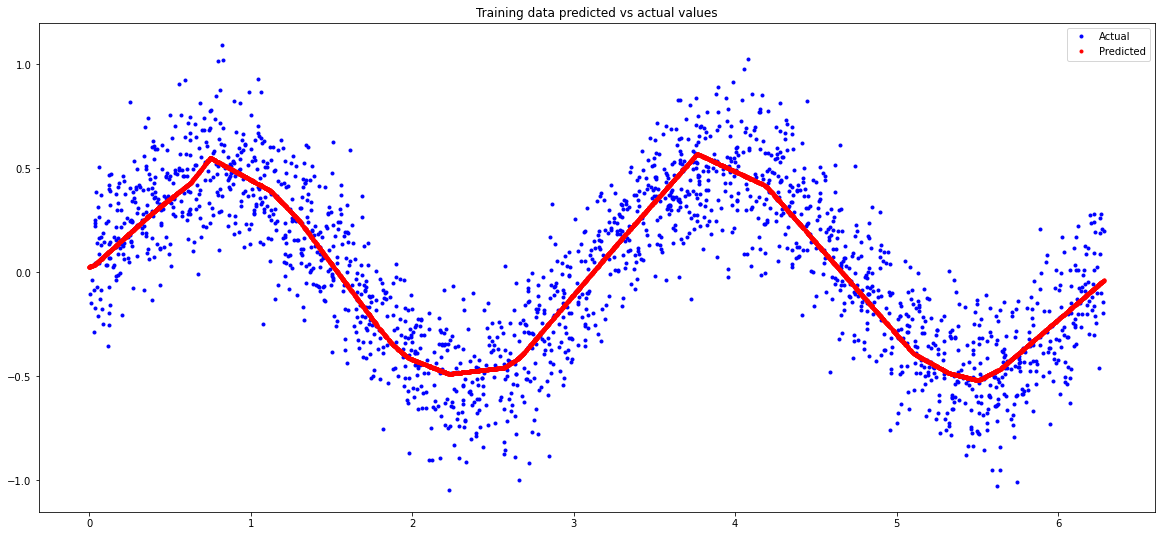

In [26]:
# Making and plotting predicitions

predictions = model_2.predict(x_train)
# Plot the predictions along with the test data
plt.figure(figsize=(20,9))
plt.title('Training data predicted vs actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual') 
plt.plot(x_train, predictions, 'r.', label='Predicted') 
plt.legend()
plt.show()

In [27]:
# Imporving model -> model 3

model_3 = tf.keras.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1))

earlystop_callback = EarlyStopping(monitor='val_mae', patience=20, mode = 'min') # Adding early stopping
model_3.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Show a summary of the model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [28]:
history_3 = model_3.fit(x_train, y_train, 
                        epochs=500, batch_size=16, 
                        validation_data=(x_validate, y_validate),
                        callbacks=[earlystop_callback])

Epoch 1/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1377 - mae: 0.3041 - val_loss: 0.1206 - val_mae: 0.2758
Epoch 2/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1025 - mae: 0.2562 - val_loss: 0.0802 - val_mae: 0.2261
Epoch 3/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0740 - mae: 0.2163 - val_loss: 0.0628 - val_mae: 0.1993
Epoch 4/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0636 - mae: 0.2009 - val_loss: 0.0549 - val_mae: 0.1860
Epoch 5/500
375/375 [==============================] - 0s 998us/step - loss: 0.0597 - mae: 0.1941 - val_loss: 0.0523 - val_mae: 0.1800
Epoch 6/500
375/375 [==============================] - 0s 998us/step - loss: 0.0570 - mae: 0.1902 - val_loss: 0.0565 - val_mae: 0.1875
Epoch 7/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0543 - mae: 0.1860 - val_loss: 0.0523 - val_mae: 0.1786
Epoch 8/500
375/375 [==============================] - 0s 1ms/ste

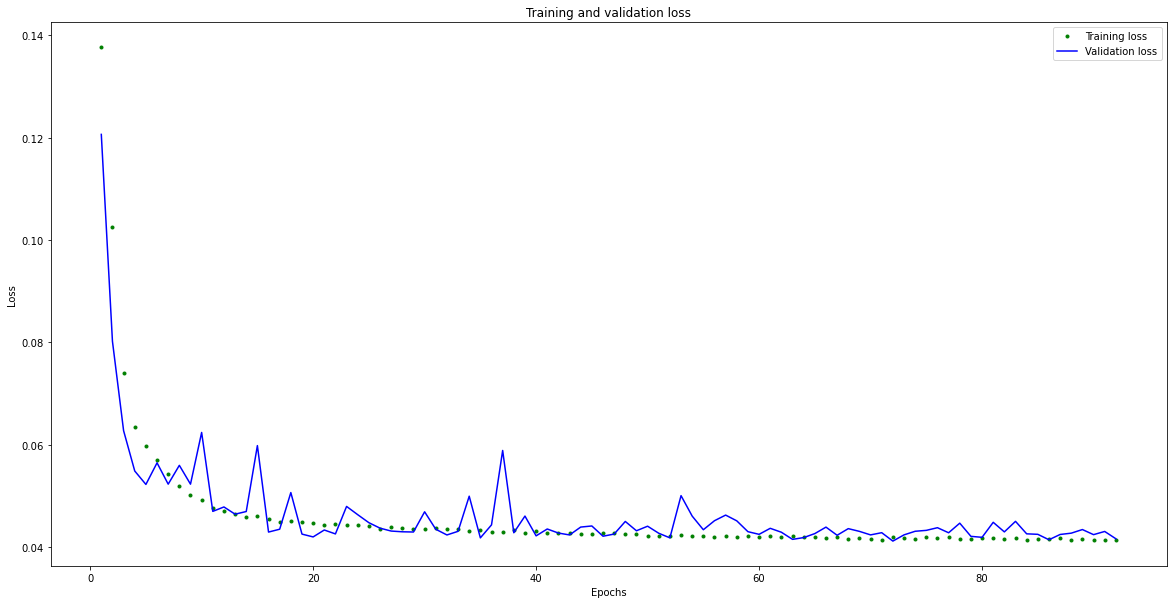

In [29]:
# Observing losses - model 3

loss = history_3.history['loss'] 
val_loss = history_3.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

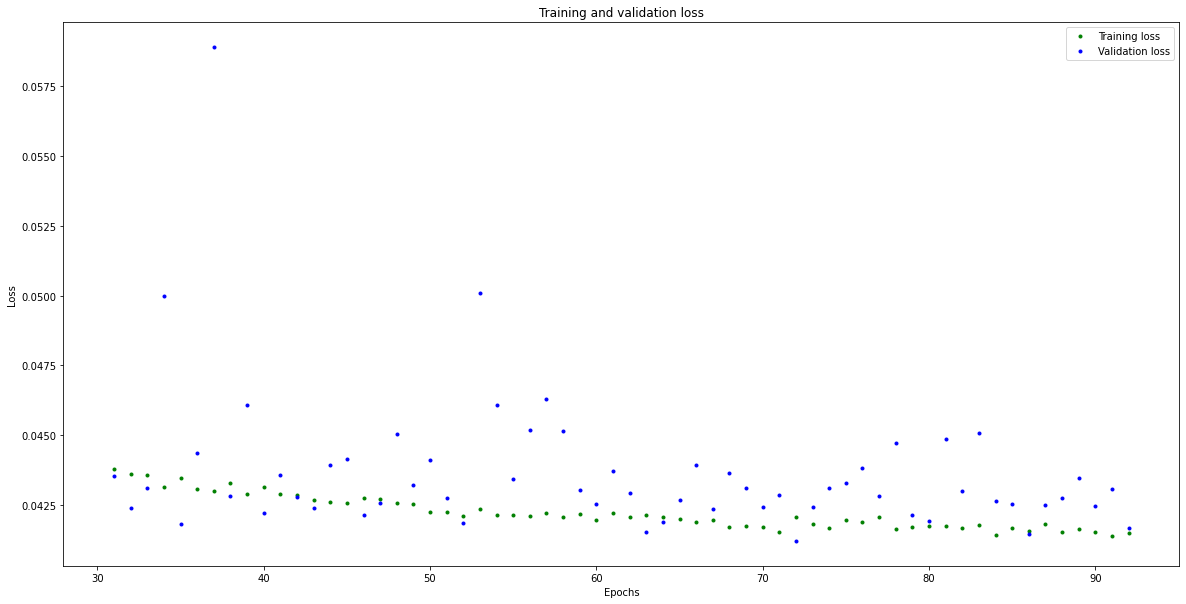

In [30]:
 # Excluding the first few epochs 
SKIP = 30
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

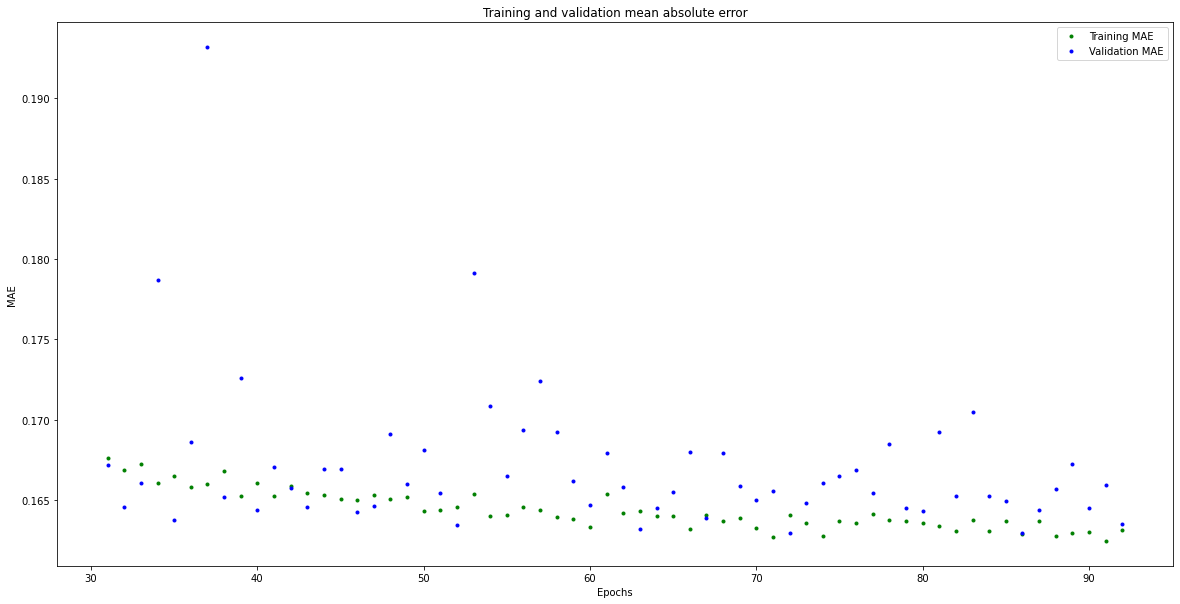

In [31]:
mae = history_3.history['mae']
val_mae = history_3.history['val_mae']
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE') 
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error') 
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

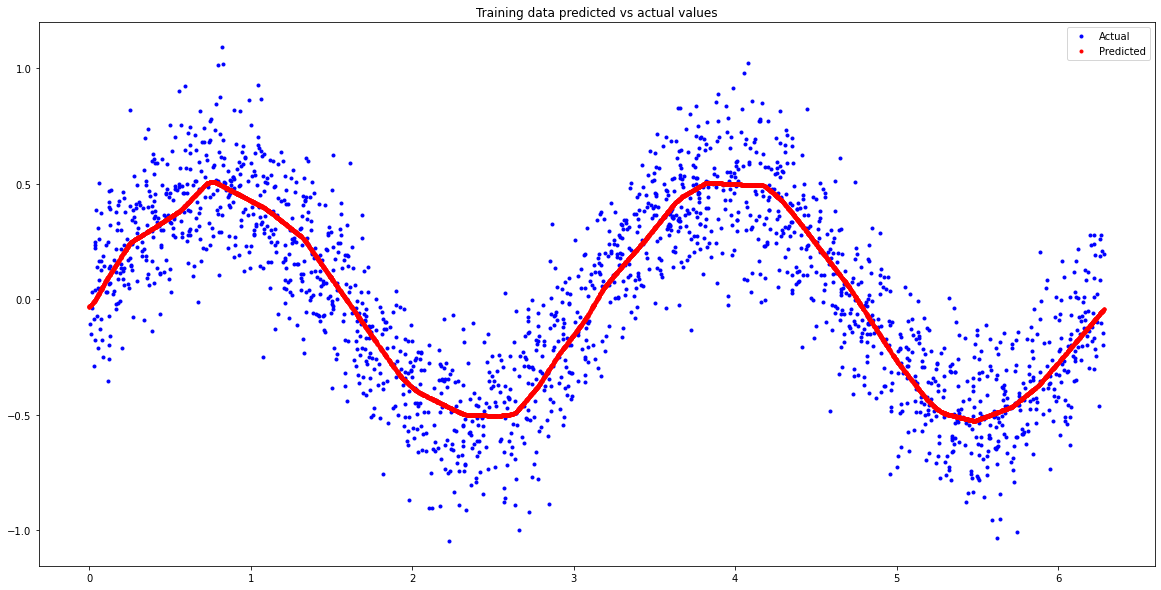

In [32]:
# Making and plotting predicitions

predictions = model_3.predict(x_train)
# Plot the predictions along with the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual') 
plt.plot(x_train, predictions, 'r.', label='Predicted') 
plt.legend()
plt.show()

In [33]:
# Model has been imporved substantially!

In [34]:
# # Now getting directories for saving stuff

# # Define paths to model files
# import os
# MODELS_DIR = 'models/'
# if not os.path.exists(MODELS_DIR):
#     os.mkdir(MODELS_DIR)
# MODEL_TF = MODELS_DIR + 'model'
# MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
# MODEL_TFLITE = MODELS_DIR + 'model.tflite'
# MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [35]:
# Convert the model to the TensorFlow Lite format WITHOUT quantization

converter = tf.lite.TFLiteConverter.from_keras_model(model_3)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /var/folders/kt/yq7c5nfx74379_pvqgbzr7v00000gn/T/tmpz272l161/assets


In [36]:
# Save the model.
with open('simple_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [37]:
# Convert the model to the TensorFlow Lite format WITH quantization

converter = tf.lite.TFLiteConverter.from_keras_model(model_3)

# Now need to optimize using default parameters

converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [38]:
# Defining the generator function that feeds in model_3's x_test inputs
# as a 'representative dataset'

def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value, dtype=np.float32, ndmin=2)] # Each scalar must be inside a 2D array in a list
        
# Tells the converter to use it        
converter.representative_dataset = representative_dataset_generator

In [39]:
# Convert the model WITH quantization
tflite_model = converter.convert()

# Save the model.
with open('simple_model_quantized.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/kt/yq7c5nfx74379_pvqgbzr7v00000gn/T/tmp2bc0928p/assets


INFO:tensorflow:Assets written to: /var/folders/kt/yq7c5nfx74379_pvqgbzr7v00000gn/T/tmp2bc0928p/assets


In [40]:
# Now I can use all models to show that new tflite models are still accurate

In [41]:
# Making predicitions with tflite is not so easy - 5 steps:
# 1) Instantiate an Interpreter object
# 2) Call some methods that allocate memory for the model
# 3) Write the input to the input tensor
# 4) Run the model
# 5) Read the output from the output tensor

In [42]:
# 1) Instantiate an interpreter for each model - used with .Interprecter call

simple_model = tf.lite.Interpreter('simple_model.tflite') 
simple_model_quantized = tf.lite.Interpreter('simple_model_quantized.tflite')

In [43]:
# 2) Allocate memory for each model - used with .allocate_tensors() method call

simple_model.allocate_tensors() 
simple_model_quantized.allocate_tensors()

In [44]:
# 3) Get indeces of the input and output tensors

simple_model_input_index = simple_model.get_input_details()[0]["index"]
simple_model_output_index = simple_model.get_output_details()[0]["index"] 

simple_model_quantized_input_index = simple_model_quantized.get_input_details()[0] ["index"]
simple_model_quantized_output_index = simple_model_quantized.get_output_details()[0]["index"]


# Create arrays to store the results
simple_model_predictions = [] 
simple_model_quantized_predictions = []

In [45]:
# 4) Run each model's interpreter for each value and store the results 

for x_value in x_test:
    # Create a 2D tensor wrapping the current x value
    
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32) # Write the value to the input tensor 
    simple_model.set_tensor(simple_model_input_index, x_value_tensor)
    
    # Run inference
    simple_model.invoke()

    # 5) Read the prediction from the output tensor
    
    simple_model_predictions.append(simple_model.get_tensor(simple_model_output_index)[0])
    
    # Do the same for quantized model...
    
    simple_model_quantized.set_tensor(simple_model_quantized_input_index, x_value_tensor)
    # Run inference
    
    simple_model_quantized.invoke()
    # 5) Read the prediction from the output tensor
    
    simple_model_quantized_predictions.append(simple_model_quantized.get_tensor(simple_model_quantized_output_index)[0])
    

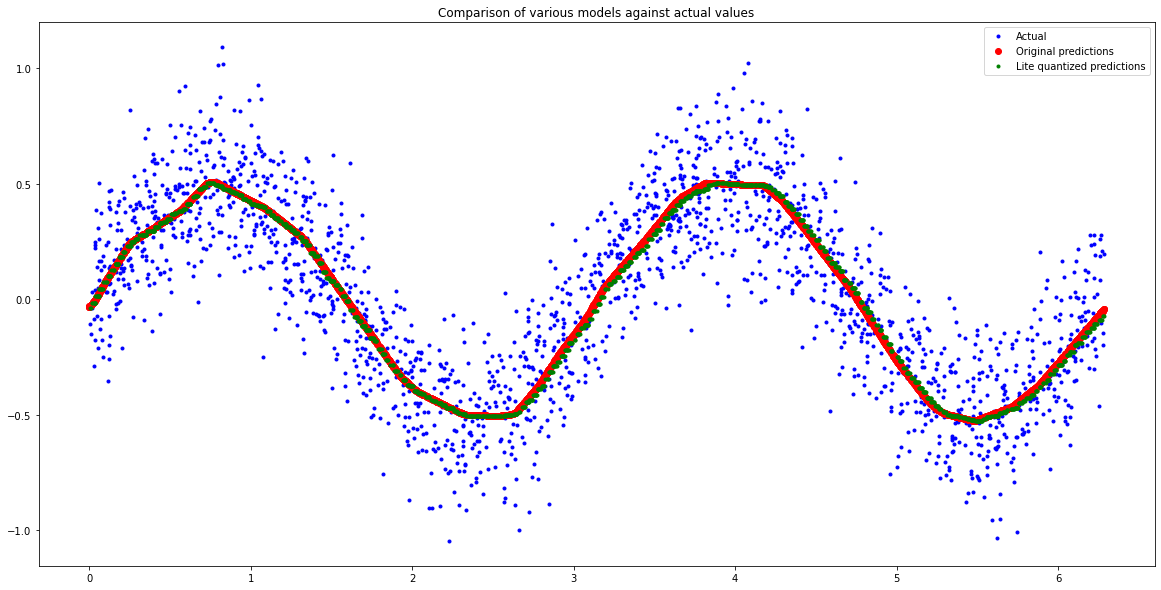

In [46]:
# Now it is easy to compare

plt.figure(figsize=(20,10))
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'ro', label='Original predictions') 
plt.plot(x_test, simple_model_quantized_predictions, 'g.',label='Lite quantized predictions') 
plt.legend()
plt.show()

In [51]:
# Very close! Model retains its accuracy, even tho its tiny

In [48]:
# Now to compare model sizes

import os
basic_model_size = os.path.getsize("simple_model.tflite")
print("Basic model is %d bytes" % basic_model_size) 
quantized_model_size = os.path.getsize("simple_model_quantized.tflite") 
print("Quantized model is %d bytes" % quantized_model_size) 
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 35968 bytes
Quantized model is 12112 bytes
Difference is 23856 bytes


In [49]:
# Now the next step is to convert the model into a machine-readable file
# AKA a C source file. Microcontrollers don’t have a filesystem,
# Can provide the model in a C source file that can be included in the binary and loaded directly into memory!
# The model can be defined as an array of bytes - xxd is able to convert a file into the required format

In [50]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i simple_model_quantized.tflite > simple_model_quantized.cc
# Print the source file
!cat simple_model_quantized.cc

/bin/bash: apt-get: command not found
unsigned char simple_model_quantized_tflite[] = {
  0x24, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00,
  0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00,
  0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0xd8, 0x2e, 0x00, 0x00,
  0x2c, 0x25, 0x00, 0x00, 0x14, 0x25, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x0c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00,
  0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f,
  0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00, 0x0f, 0x00, 0x00, 0x00,
  0xc4, 0x24, 0x00, 0x00, 0xb0, 0x24, 0x00, 0x00, 0x94, 0x23, 0x00, 0x00,
  0x70, 0x22, 0x00, 0x00, 0x5c, 0x21, 0x00, 0x00, 0x48, 0x21, 0x00, 0x00,
  0xf4, 0x20, 0x00, 0x00